## Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 cases. (25 points)

- Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.
- Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.
- Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

In [119]:
import pandas as mb
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import mode
from scipy.stats import poisson
import plotly.express as px
from plotly.subplots import make_subplots
FACTOR = 1000 # for normalisation

In [2]:
## all confirmed cases
cases = mb.read_csv("../../Team/covid_confirmed_usafacts.csv")

# Define the date range to select/ We want to look at July-December
start_date = '2020-07-01'
end_date = '2020-12-31'

# Define the list of additional columns
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]

# Use the loc method to select the desired columns and date range
selected_cases = cases.loc[:, additional_columns + list(cases.columns[(cases.columns >= start_date) & (cases.columns <= end_date)])]

In [3]:
ny_cases = cases.loc[cases['State'] == 'NY']
ny_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1860,0,Statewide Unallocated,NY,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1861,36001,Albany County,NY,36,0,0,0,0,0,0,...,80317,80317,80317,80317,80317,80346,80346,80346,80346,80346
1862,36003,Allegany County,NY,36,0,0,0,0,0,0,...,11019,11019,11019,11019,11019,11023,11023,11023,11023,11023
1863,36005,Bronx County,NY,36,0,0,0,0,0,0,...,516506,516506,516506,516506,516506,516827,516827,516827,516827,516827
1864,36007,Broome County,NY,36,0,0,0,0,0,0,...,60127,60127,60127,60127,60127,60149,60149,60149,60149,60149


In [4]:
# July 1, 2020 is a Wednesday
count = 2
weekly_cases_ny = [] # where Wednesday from each week is chosen
for col in ny_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ny.append(ny_cases[col].sum())
weekly_cases_ny_data = mb.Series(weekly_cases_ny)

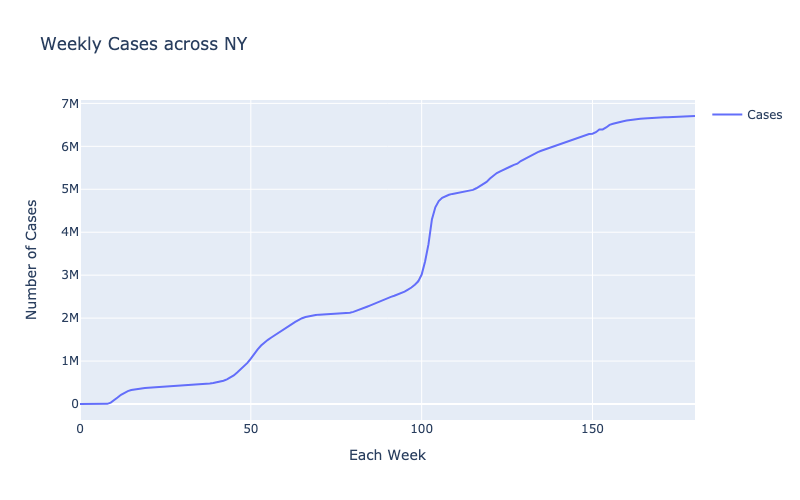

In [5]:
# Graph  data
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_ny_data.index, y=weekly_cases_ny_data,
                         mode='lines', name='Cases'))
fig.update_layout(
    title='Weekly Cases across NY',
    xaxis=dict(title='Each Week'),
    yaxis=dict(title='Number of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("weekly_cases_ny_data.png")
Image(filename="weekly_cases_ny_data.png")

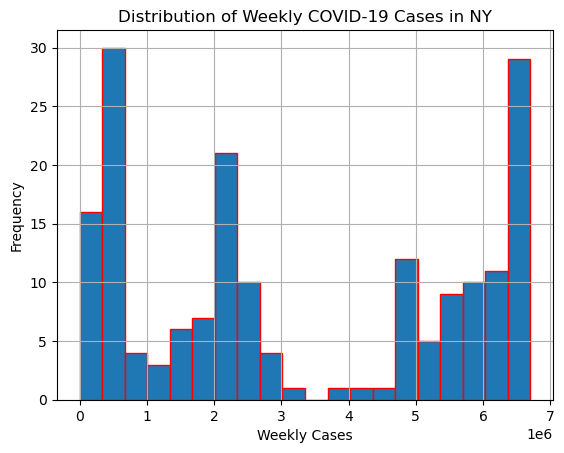

In [6]:

# Plot a histogram with a specified number of bins
plt.hist(weekly_cases_ny_data, bins=20, ec='red')
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly COVID-19 Cases in NY")
plt.grid(True)

# Show the plot
plt.show()

In [180]:
# Calculate center
center = weekly_cases_ny_data.mean()

# Calculate variance
variance = weekly_cases_ny_data.var()

# Calculate kurtosis
kurt = weekly_cases_ny_data.kurt()

# Calculate skewness
skew = weekly_cases_ny_data.skew()

# Perform a Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(weekly_cases_ny_data, 'norm')

# Determine the modality using scipy's mode function
def get_modality(data):
    # Calculate the mode (most frequent value) in the data
    mode_result = mode(data)
    if mode_result.count[0] == 1:
        return "Unimodal"
    elif mode_result.count[0] == 2:
        return "Bimodal"
    else:
        return "Multimodal"

modality = get_modality(weekly_cases_ny_data)

# Display the modality and statistics
print("Center: ", center)
print("Variance: ", variance)
print("Modality: ", modality)
print("Kurtosis: ", kurt)
print("Skewness: ", skew)
print("KS Test p-value: ", ks_p_value)

Center:  3285120.5966850827
Variance:  6078852892238.283
Modality:  Multimodal
Kurtosis:  -1.6149603422147845
Skewness:  0.12295331929172575
KS Test p-value:  3.210585676242359e-268


/var/folders/pm/ssq4gfw93vg42r17gw5gjrtc0000gn/T/ipykernel_21608/2400366077.py:19: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [8]:
# [1] Case data for Florida (FL)
casesFL = cases.loc[cases['State'] == 'FL']

# Gather weekly Florida cases
count = 2
weeklyCasesFL = []
for col in casesFL.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesFL.append(casesFL[col].sum())
dfWeeklyCasesFL = mb.Series(weeklyCasesFL)


# [2] Case data for Michigan (MI)
casesMI = cases.loc[cases['State'] == 'MI']

# Gather weekly Michigan cases
count = 2
weeklyCasesMI = []
for col in casesMI.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesMI.append(casesMI[col].sum())
dfWeeklyCasesMI = mb.Series(weeklyCasesMI)

# [3] Case data for North Carolina (NC)
casesNC = cases.loc[cases['State'] == 'NC']

# Gather weekly North Carolina cases
count = 2
weeklyCasesNC = []
for col in casesNC.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesNC.append(casesNC[col].sum())
dfWeeklyCasesNC = mb.Series(weeklyCasesNC)
dfWeeklyCasesNC.head()


# [4] Case data for New Jersey (NJ)
casesNJ = cases.loc[cases['State'] == 'NJ']

# Gather weekly New Jersey cases
count = 2
weeklyCasesNJ = []
for col in casesNJ.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesNJ.append(casesNJ[col].sum())
dfWeeklyCasesNJ = mb.Series(weeklyCasesNJ)
dfWeeklyCasesNJ.head()


# [5] Case data for Texas (TX)
casesTX = cases.loc[cases['State'] == 'TX']

# Gather weekly Texas cases
count = 2
weeklyCasesTX = []
for col in casesTX.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesTX.append(casesTX[col].sum())
dfWeeklyCasesTX = mb.Series(weeklyCasesTX)


## Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

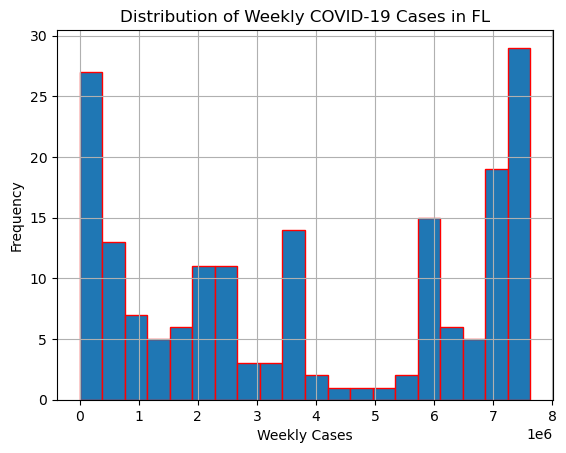

In [9]:
plt.hist(dfWeeklyCasesFL, bins=20, ec='red')
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly COVID-19 Cases in FL")
plt.grid(True)


# Show the plot
plt.show()

In [174]:
# Calculate center
center = dfWeeklyCasesFL.mean()

# Calculate variance
variance = dfWeeklyCasesFL.var()

# Calculate kurtosis
kurt = dfWeeklyCasesFL.kurt()

# Calculate skewness
skew = dfWeeklyCasesFL.skew()

# Perform a Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(dfWeeklyCasesFL, 'norm')

# Determine the modality using scipy's mode function
def get_modality(data):
    # Calculate the mode (most frequent value) in the data
    mode_result = mode(data)
    if mode_result.count[0] == 1:
        return "Unimodal"
    elif mode_result.count[0] == 2:
        return "Bimodal"
    else:
        return "Multimodal"

modality = get_modality(dfWeeklyCasesFL)

# Display the modality and statistics
print("Center: ", center)
print("Variance: ", variance)
print("Modality: ", modality)
print("Kurtosis: ", kurt)
print("Skewness: ", skew)
print("KS Test p-value: ", ks_p_value)

Center:  3854168.585635359
Variance:  7999572356562.776
Modality:  Multimodal
Kurtosis:  -1.6011469834514422
Skewness:  0.02154710249982093
KS Test p-value:  4.206812819296756e-256


/var/folders/pm/ssq4gfw93vg42r17gw5gjrtc0000gn/T/ipykernel_21608/1705716862.py:19: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



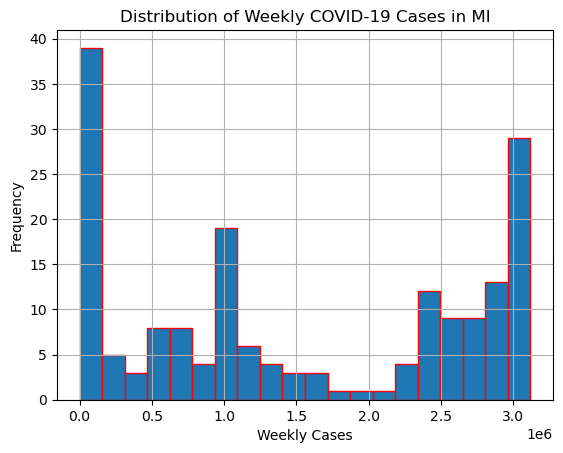

In [10]:
plt.hist(dfWeeklyCasesMI, bins=20, ec='red')
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly COVID-19 Cases in MI")
plt.grid(True)

# Show the plot
plt.show()

In [175]:
# Calculate center
center = dfWeeklyCasesMI.mean()

# Calculate variance
variance = dfWeeklyCasesMI.var()

# Calculate kurtosis
kurt = dfWeeklyCasesMI.kurt()

# Calculate skewness
skew = dfWeeklyCasesFL.skew()

# Perform a Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(dfWeeklyCasesMI, 'norm')

# Determine the modality using scipy's mode function
def get_modality(data):
    # Calculate the mode (most frequent value) in the data
    mode_result = mode(data)
    if mode_result.count[0] == 1:
        return "Unimodal"
    elif mode_result.count[0] == 2:
        return "Bimodal"
    else:
        return "Multimodal"

modality = get_modality(dfWeeklyCasesMI)

# Display the modality and statistics
print("Center: ", center)
print("Variance: ", variance)
print("Modality: ", modality)
print("Kurtosis: ", kurt)
print("Skewness: ", skew)
print("KS Test p-value: ", ks_p_value)

Center:  1530436.5193370166
Variance:  1367590015347.0732
Modality:  Multimodal
Kurtosis:  -1.6237808415692034
Skewness:  0.02154710249982093
KS Test p-value:  1.3197620980767247e-245


/var/folders/pm/ssq4gfw93vg42r17gw5gjrtc0000gn/T/ipykernel_21608/2305373121.py:19: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



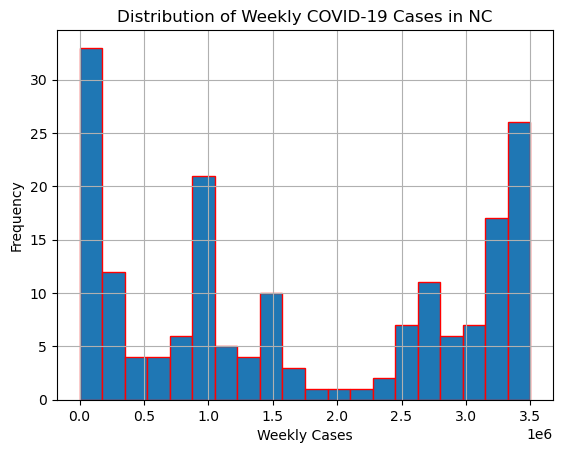

In [11]:
plt.hist(dfWeeklyCasesNC, bins=20, ec='red')
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly COVID-19 Cases in NC")
plt.grid(True)

# Show the plot
plt.show()

In [176]:
# Calculate center
center = dfWeeklyCasesNC.mean()

# Calculate variance
variance = dfWeeklyCasesNC.var()

# Calculate kurtosis
kurt = dfWeeklyCasesNC.kurt()

# Calculate skewness
skew = dfWeeklyCasesNC.skew()

# Perform a Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(dfWeeklyCasesNC, 'norm')

# Determine the modality using scipy's mode function
def get_modality(data):
    # Calculate the mode (most frequent value) in the data
    mode_result = mode(data)
    if mode_result.count[0] == 1:
        return "Unimodal"
    elif mode_result.count[0] == 2:
        return "Bimodal"
    else:
        return "Multimodal"

modality = get_modality(dfWeeklyCasesNC)

# Display the modality and statistics
print("Center: ", center)
print("Variance: ", variance)
print("Modality: ", modality)
print("Kurtosis: ", kurt)
print("Skewness: ", skew)
print("KS Test p-value: ", ks_p_value)

Center:  1697543.6740331491
Variance:  1704653531543.6199
Modality:  Multimodal
Kurtosis:  -1.595251682192714
Skewness:  0.10236570426819958
KS Test p-value:  4.206812819296756e-256


/var/folders/pm/ssq4gfw93vg42r17gw5gjrtc0000gn/T/ipykernel_21608/742971689.py:19: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



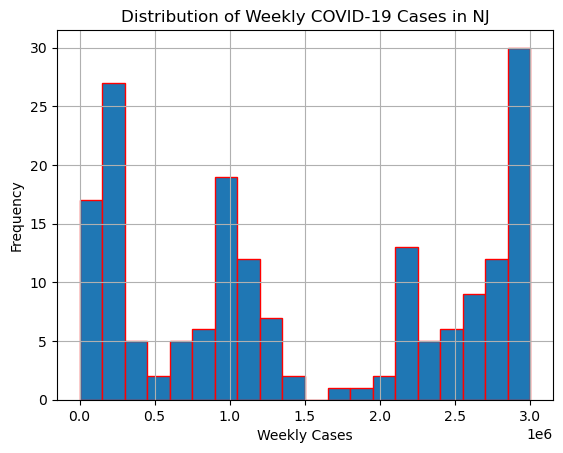

In [12]:
plt.hist(dfWeeklyCasesNJ, bins=20, ec='red')
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly COVID-19 Cases in NJ")
plt.grid(True)

# Show the plot
plt.show()

In [177]:
# Calculate center
center = dfWeeklyCasesNJ.mean()

# Calculate variance
variance = dfWeeklyCasesNJ.var()

# Calculate kurtosis
kurt = dfWeeklyCasesNJ.kurt()

# Calculate skewness
skew = dfWeeklyCasesNJ.skew()

# Perform a Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(dfWeeklyCasesNJ, 'norm')

# Determine the modality using scipy's mode function
def get_modality(data):
    # Calculate the mode (most frequent value) in the data
    mode_result = mode(data)
    if mode_result.count[0] == 1:
        return "Unimodal"
    elif mode_result.count[0] == 2:
        return "Bimodal"
    else:
        return "Multimodal"

modality = get_modality(dfWeeklyCasesNJ)

# Display the modality and statistics
print("Center: ", center)
print("Variance: ", variance)
print("Modality: ", modality)
print("Kurtosis: ", kurt)
print("Skewness: ", skew)
print("KS Test p-value: ", ks_p_value)

Center:  1494947.6906077347
Variance:  1205874931522.782
Modality:  Multimodal
Kurtosis:  -1.5668007511348705
Skewness:  0.09508554190631668
KS Test p-value:  4.206812819296756e-256


/var/folders/pm/ssq4gfw93vg42r17gw5gjrtc0000gn/T/ipykernel_21608/2224026633.py:19: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



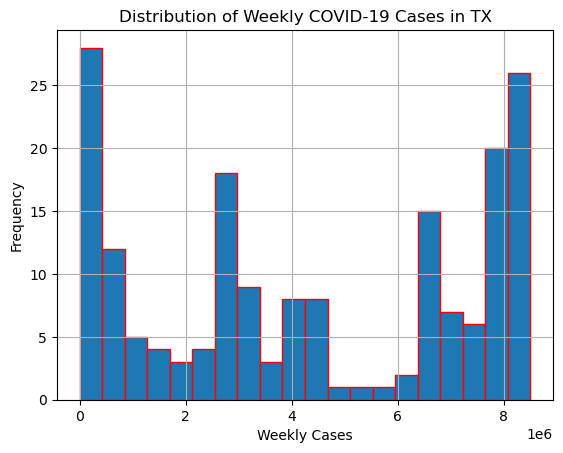

In [13]:
plt.hist(dfWeeklyCasesTX, bins=20, ec='red')
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly COVID-19 Cases in TX")
plt.grid(True)

# Show the plot
plt.show()

In [178]:
# Calculate center
center = dfWeeklyCasesTX.mean()

# Calculate variance
variance = dfWeeklyCasesTX.var()

# Calculate kurtosis
kurt = dfWeeklyCasesTX.kurt()

# Calculate skewness
skew = dfWeeklyCasesTX.skew()

# Perform a Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(dfWeeklyCasesTX, 'norm')

# Determine the modality using scipy's mode function
def get_modality(data):
    # Calculate the mode (most frequent value) in the data
    mode_result = mode(data)
    if mode_result.count[0] == 1:
        return "Unimodal"
    elif mode_result.count[0] == 2:
        return "Bimodal"
    else:
        return "Multimodal"

modality = get_modality(dfWeeklyCasesTX)

# Display the modality and statistics
print("Center: ", center)
print("Variance: ", variance)
print("Modality: ", modality)
print("Kurtosis: ", kurt)
print("Skewness: ", skew)
print("KS Test p-value: ", ks_p_value)

Center:  4367164.022099447
Variance:  9591373815347.393
Modality:  Multimodal
Kurtosis:  -1.5341872728454027
Skewness:  -0.0397216312581319
KS Test p-value:  4.206812819296756e-256


/var/folders/pm/ssq4gfw93vg42r17gw5gjrtc0000gn/T/ipykernel_21608/1757954797.py:19: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



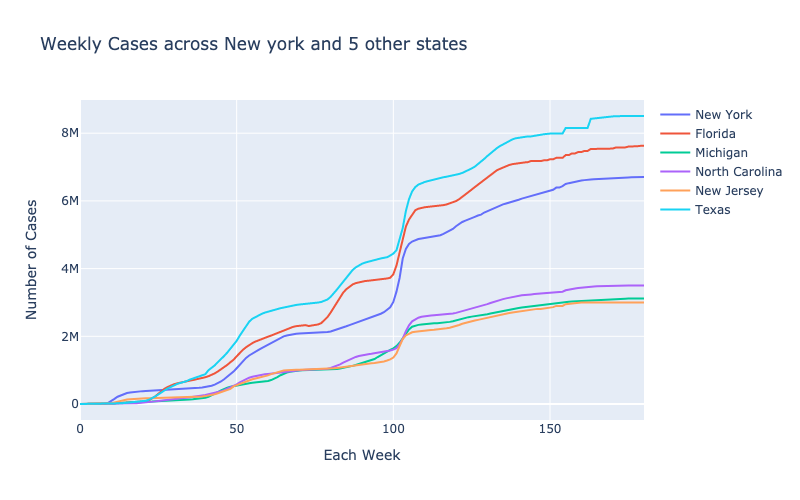

In [14]:
# Graph the 5 other states case data
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_ny_data.index, y=weekly_cases_ny_data,
                         mode='lines', name='New York'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesFL.index, y=dfWeeklyCasesFL,
                         mode='lines', name='Florida'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesMI.index, y=dfWeeklyCasesMI,
                         mode='lines', name='Michigan'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesNC.index, y=dfWeeklyCasesNC,
                         mode='lines', name='North Carolina'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesNJ.index, y=dfWeeklyCasesNJ,
                         mode='lines', name='New Jersey'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesTX.index, y=dfWeeklyCasesTX,
                         mode='lines', name='Texas'))
fig.update_layout(
    title='Weekly Cases across New york and 5 other states',
    xaxis=dict(title='Each Week'),
    yaxis=dict(title='Number of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("compare_cases.png")
Image(filename="compare_cases.png")

### Compare the states all together

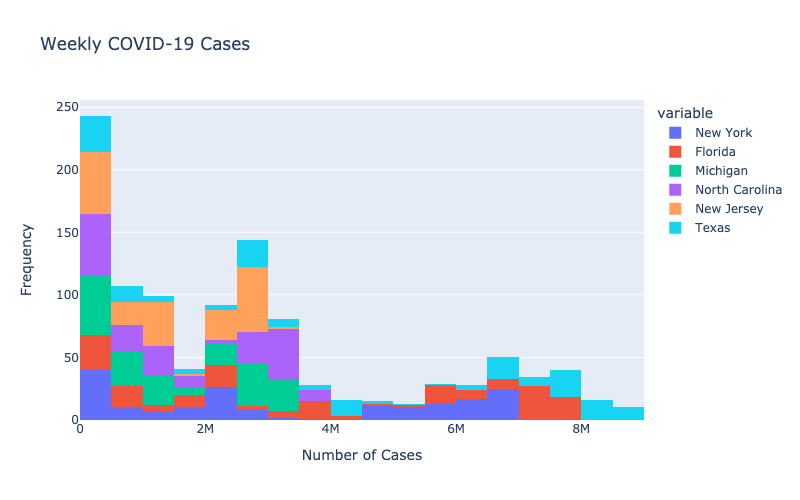

In [15]:
# Create a DataFrame with all the data
data = {
    'New York': weekly_cases_ny_data,
    'Florida': dfWeeklyCasesFL,
    'Michigan': dfWeeklyCasesMI,
    'North Carolina': dfWeeklyCasesNC,
    'New Jersey': dfWeeklyCasesNJ,
    'Texas': dfWeeklyCasesTX
}
df = mb.DataFrame(data)

# Create a histogram for each state
fig = px.histogram(df, x=df.columns, nbins=20, labels={'value': 'Number of Cases'}, title='Weekly COVID-19 Cases')

# Update layout
fig.update_layout(
    xaxis_title='Number of Cases',
    yaxis_title='Frequency',
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("ALLhistogram_cases.png")
Image(filename="ALLhistogram_cases.png")

## Describe if the distributions look different and what does that imply.

#### When comparing the distributions and their statistics to those of five other states, it becomes evident that the majority of the distributions exhibit a bimodal shape or are multimodal. Additionally, these distributions tend to skew to the right.

#### The commonality of right-skewed distributions among most states suggests a consistent pattern in the progression of COVID-19 cases across different regions. This pattern indicates that, in general, states experienced a similar trend of increasing COVID-19 cases, marked by distinct peaks and fluctuations over time. The resemblance in the distribution shapes and skewness across states implies that external factors and underlying dynamics may have played a comparable role in the spread and control of the virus in these regions.

# Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did. (25 points)

- For example, number of new cases and deaths per 100,000 population.
- Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

In [17]:
deaths = mb.read_csv('../../Team/covid_deaths_usafacts.csv')

# deaths data for Ny
deathsNY = deaths.loc[deaths['State'] == 'NY']

# Gather weekly New Jersey Deaths
count = 2
weeklyDeathsNY = []
for col in deathsNY.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsNY.append(deathsNY[col].sum())
dfWeeklyDeatxhsNY = mb.Series(weeklyDeathsNY)


### Read the Deaths data for the 5 other states(FL, MI, NC, NJ, TX)

In [18]:
# [1] deaths data for Florida (FL)
deathsFL = deaths.loc[deaths['State'] == 'FL']

# Gather weekly Florida Deaths
count = 2
weeklyDeathsFL = []
for col in deathsFL.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsFL.append(deathsFL[col].sum())
dfWeeklyDeathsFL = mb.Series(weeklyDeathsFL)
dfWeeklyDeathsFL.head()


# [2] deaths data for Michigan (MI)
deathsMI = deaths.loc[deaths['State'] == 'MI']

# Gather weekly Michigan Deaths
count = 2
weeklyDeathsMI = []
for col in deathsMI.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsMI.append(deathsMI[col].sum())
dfWeeklyDeathsMI = mb.Series(weeklyDeathsMI)
dfWeeklyDeathsMI.head()

# [3] deaths data for North Carolina (NC)
deathsNC = deaths.loc[deaths['State'] == 'NC']

# Gather weekly North Carolina Deaths
count = 2
weeklyDeathsNC = []
for col in deathsNC.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsNC.append(deathsNC[col].sum())
dfWeeklyDeathsNC = mb.Series(weeklyDeathsNC)
dfWeeklyDeathsNC.head()

# [4] deaths data for New Jersey (NJ)
deathsNJ = deaths.loc[deaths['State'] == 'NJ']

# Gather weekly New Jersey Deaths
count = 2
weeklyDeathsNJ = []
for col in deathsNJ.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsNJ.append(deathsNJ[col].sum())
dfWeeklyDeathsNJ = mb.Series(weeklyDeathsNJ)
dfWeeklyDeathsNJ.head()


# [5] deaths data for Texas (TX)
deathsTX = deaths.loc[deaths['State'] == 'TX']

# Gather weekly Texas Deaths
count = 2
weeklyDeathsTX = []
for col in deathsTX.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsTX.append(deathsTX[col].sum())
dfWeeklyDeathsTX = mb.Series(weeklyDeathsTX)

## Poission distribution of COVID-19 cases and deaths of NY

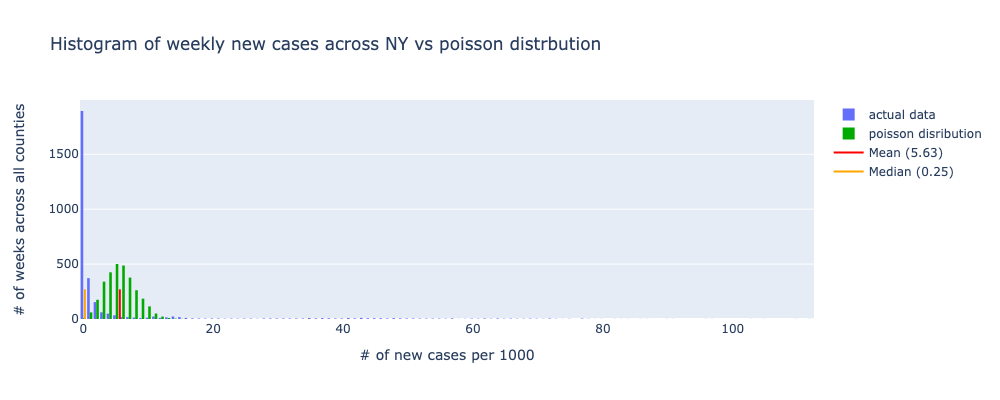

In [132]:
data = np.reshape(ny_cases[selected_date_columns[0::7]].to_numpy(), -1)
data = data /1000
fig = go.Figure()
fig.add_trace(go.Histogram(x=data, name='actual data'))
fig.add_trace(go.Histogram(x=np.random.poisson(np.mean(data), len(data)), name='poisson disribution', marker_color='#00AA00'))

mean = np.mean(data)
fig.add_shape(go.layout.Shape(type='line', x0=mean, x1=mean, y0=0, y1=270, line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=f'Mean ({mean:.2f})', line=dict(color='red', width=2)))


median = np.median(data)
fig.add_shape(go.layout.Shape(type='line', x0=median, x1=median, y0=0, y1=270, line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=f'Median ({median:.2f})', line=dict(color='orange', width=2)))

fig.update_layout(
    title='Histogram of weekly new cases across NY vs poisson distrbution',
    xaxis=dict(title=f'# of new cases per {FACTOR}'),
    yaxis=dict(title='# of weeks across all counties'),
    showlegend=True,
    width=1000,
    height=400
)

fig.write_image("poisson-cases.png")
Image(filename="poisson-cases.png")

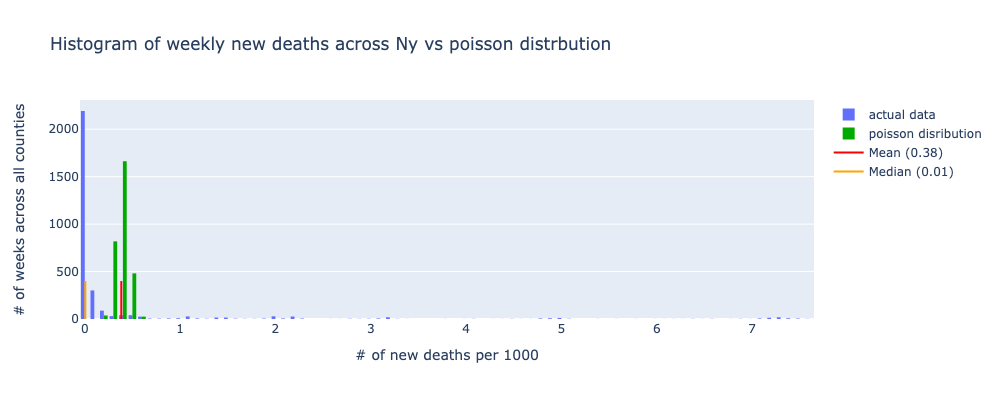

In [181]:

data = np.reshape(deathsNY[selected_date_columns[0::7]].to_numpy(), -1)
data = data / 1000
fig = go.Figure()
fig.add_trace(go.Histogram(x=data, name='actual data'))
fig.add_trace(go.Histogram(x=(np.random.poisson(np.mean(data) *100, len(data)) /100), name='poisson disribution', marker_color='#00AA00'))

mean = np.mean(data)
fig.add_shape(go.layout.Shape(type='line', x0=mean, x1=mean, y0=0, y1=400, line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=f'Mean ({mean:.2f})', line=dict(color='red', width=2)))


median = np.median(data)
fig.add_shape(go.layout.Shape(type='line', x0=median, x1=median, y0=0, y1=400, line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=f'Median ({median:.2f})', line=dict(color='orange', width=2)))

fig.update_layout(
    title='Histogram of weekly new deaths across Ny vs poisson distrbution',
    xaxis=dict(title=f'# of new deaths per {FACTOR}'),
    yaxis=dict(title='# of weeks across all counties'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)


fig.write_image("poisson-death.png")
Image(filename="poisson-death.png")

In [182]:
poisson_ny = np.random.poisson(np.mean(weekly_cases_ny_data/1000000), len(weekly_cases_ny_data/1000000))

fig = go.Figure()

fig.add_trace(go.Histogram(x=weekly_cases_ny_data, name='Original Distribution', histnorm='probability'))
fig.add_trace(go.Histogram(x=poisson_ny, name='Poisson Distribution', histnorm='probability'))

fig.update_xaxes(title_text="# of Cases")
fig.update_layout(
    title='Weekly Cases across NY, Original vs Poisson Distribution',
    showlegend=True,
    width=800,
    height=500
)

fig.show()

# Poission distribution of COVID-19 cases of New York and compared to other 5 states

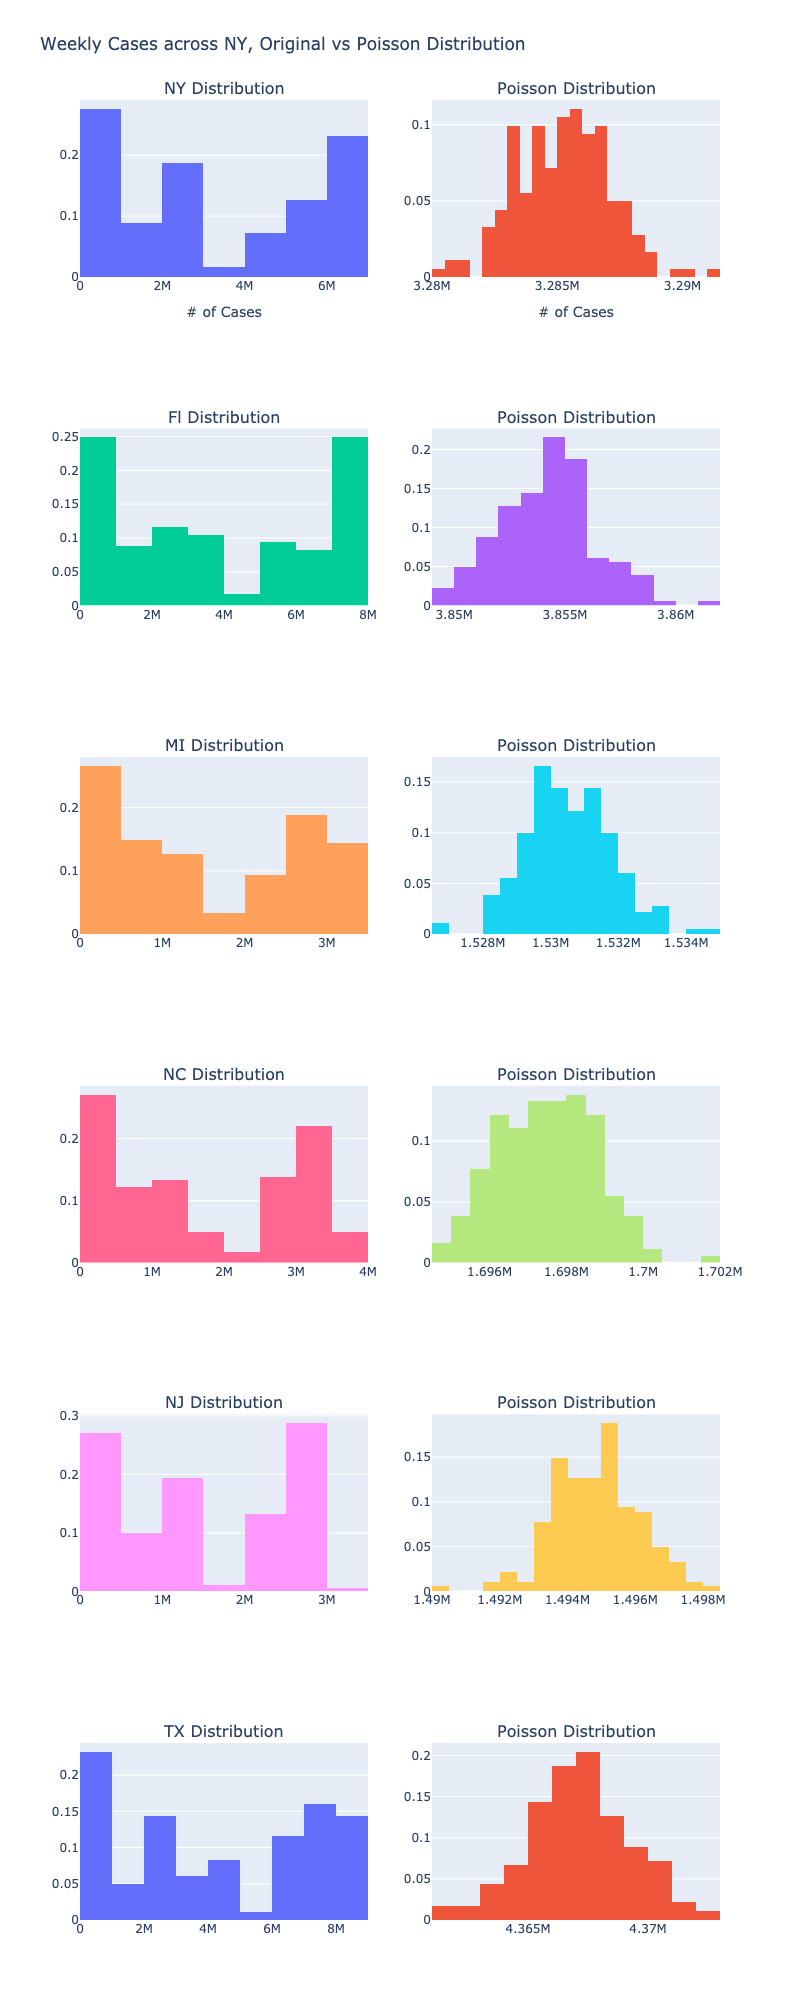

In [170]:
poisson_ny = np.random.poisson(np.mean(weekly_cases_ny_data), len(weekly_cases_ny_data))
poisson_FL = np.random.poisson(np.mean(dfWeeklyCasesFL), len(dfWeeklyCasesFL))
poisson_MI = np.random.poisson(np.mean(dfWeeklyCasesMI), len(dfWeeklyCasesMI))
poisson_NC = np.random.poisson(np.mean(dfWeeklyCasesNC), len(dfWeeklyCasesNC))
poisson_NJ = np.random.poisson(np.mean(dfWeeklyCasesNJ), len(dfWeeklyCasesNJ))
poisson_TX = np.random.poisson(np.mean(dfWeeklyCasesTX), len(dfWeeklyCasesTX))

fig = make_subplots(rows=6, cols=2, subplot_titles=('NY Distribution', 'Poisson Distribution', 'Fl Distribution', 'Poisson Distribution', 
                                                   'MI Distribution', 'Poisson Distribution', 'NC Distribution', 'Poisson Distribution',
                                                   'NJ Distribution', 'Poisson Distribution', 'TX Distribution', 'Poisson Distribution',))

fig.add_trace(go.Histogram(x=weekly_cases_ny_data, histnorm='probability'),row=1, col=1)
fig.add_trace( go.Histogram(x=poisson_ny, histnorm='probability'),row=1, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyCasesFL, histnorm='probability'), row=(2), col=1)
fig.add_trace( go.Histogram(x=poisson_FL, histnorm='probability'),row=2, col=2)


fig.add_trace(go.Histogram(x=dfWeeklyCasesMI, histnorm='probability'), row=(3), col=1)
fig.add_trace( go.Histogram(x=poisson_MI, histnorm='probability'),row=3, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyCasesNC, histnorm='probability'), row=(4), col=1)
fig.add_trace( go.Histogram(x=poisson_NC, histnorm='probability'),row=4, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyCasesNJ, histnorm='probability'), row=(5), col=1)
fig.add_trace( go.Histogram(x=poisson_NJ, histnorm='probability'),row=5, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyCasesTX, histnorm='probability'), row=(6), col=1)
fig.add_trace( go.Histogram(x=poisson_TX, histnorm='probability'),row=6, col=2)


fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across NY, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500*4
)

fig.write_image("poisson_casesALL.png")
Image(filename="poisson_casesALL.png")

## Poission distribution of COVID-19 deaths of New York and compared to other 5 states

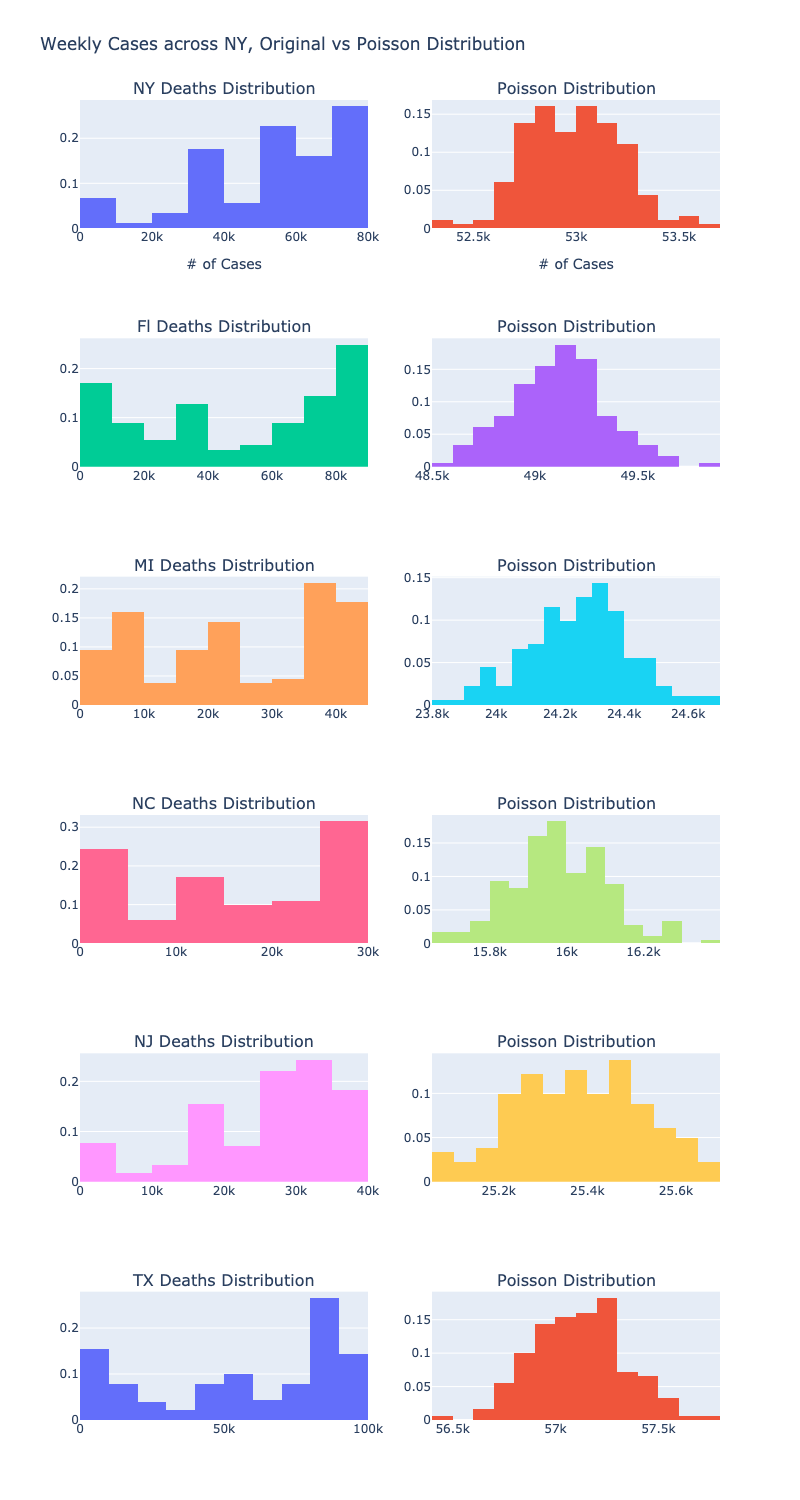

In [173]:
poisson_nydeaths = np.random.poisson(np.mean(dfWeeklyDeathsNY), len(dfWeeklyDeathsNY))
poisson_FLdeaths = np.random.poisson(np.mean(dfWeeklyDeathsFL), len(dfWeeklyDeathsFL))
poisson_MIdeaths = np.random.poisson(np.mean(dfWeeklyDeathsMI), len(dfWeeklyDeathsMI))
poisson_NCdeaths = np.random.poisson(np.mean(dfWeeklyDeathsNC), len(dfWeeklyDeathsNC))
poisson_NJdeaths = np.random.poisson(np.mean(dfWeeklyDeathsNJ), len(dfWeeklyDeathsNJ))
poisson_TXdeaths = np.random.poisson(np.mean(dfWeeklyDeathsTX), len(dfWeeklyDeathsTX))

fig = make_subplots(rows=6, cols=2, subplot_titles=('NY Deaths Distribution', 'Poisson Distribution', 'Fl Deaths Distribution', 'Poisson Distribution', 
                                                   'MI Deaths Distribution', 'Poisson Distribution', 'NC Deaths Distribution', 'Poisson Distribution',
                                                   'NJ Deaths Distribution', 'Poisson Distribution', 'TX Deaths Distribution', 'Poisson Distribution',))

fig.add_trace(go.Histogram(x=dfWeeklyDeathsNY, histnorm='probability'),row=1, col=1)
fig.add_trace( go.Histogram(x=poisson_nydeaths, histnorm='probability'),row=1, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyDeathsFL, histnorm='probability'), row=(2), col=1)
fig.add_trace( go.Histogram(x=poisson_FLdeaths, histnorm='probability'),row=2, col=2)


fig.add_trace(go.Histogram(x=dfWeeklyDeathsMI, histnorm='probability'), row=(3), col=1)
fig.add_trace( go.Histogram(x=poisson_MIdeaths, histnorm='probability'),row=3, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyDeathsNC, histnorm='probability'), row=(4), col=1)
fig.add_trace( go.Histogram(x=poisson_NCdeaths, histnorm='probability'),row=4, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyDeathsNJ, histnorm='probability'), row=(5), col=1)
fig.add_trace( go.Histogram(x=poisson_NJdeaths, histnorm='probability'),row=5, col=2)

fig.add_trace(go.Histogram(x=dfWeeklyDeathsTX, histnorm='probability'), row=(6), col=1)
fig.add_trace( go.Histogram(x=poisson_TXdeaths, histnorm='probability'),row=6, col=2)


fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases across NY, Original vs Poisson Distribution',
    showlegend=False,
    width=800,
    height=500*3
)

fig.write_image("poisson_deathsALL.png")
Image(filename="poisson_deathsALL.png")

## Differences?

## first Modeling (Histogram):
- In the first modeling, I created a histogram to visualize the distribution of actual data (weekly new cases in this case) in North Carolina.
- It provided a descriptive summary of the data and how it is distributed.-0The histogram doesn't make any specific assumptions about the distribution; it's a general way to explore the data visually.
## Poisson Modeling:
- Poisson modeling, on the other hand, is a statistical technique that assumes the data follows a Poisson distribution.
- The Poisson distribution is commonly used to model events that occur with a known constant mean rate and independently of the time since the last event. In this case, modeling weekly new cases using a Poisson distribution.
- The Poisson modeling provides a probability distribution for the data, making it possible to calculate probabilities of observing specific values.
- The Poisson model assumes that the data follows a specific probability distribution with a single parameter, the mean rate.
### So, the key difference is in the underlying assumptions and the statistical modeling approach. The first modeling provides a descriptive view of the data, while Poisson modeling is a more formal and specific way to analyze data based on the assumption of a Poisson distribution.

# Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)

- You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

In [33]:
# import all the employment data 
employment_jan_feb_mar = mb.read_excel('allhlcn201.xlsx')
employment_apr_may_jun = mb.read_excel('allhlcn202.xlsx')
employment_jul_aug_sep = mb.read_excel('allhlcn203.xlsx')
employment_oct_nov_dec = mb.read_excel('allhlcn204.xlsx')

# filter the data to only get the New york data and in the corresponding months
ny_employment_jan_feb_mar = employment_jan_feb_mar[employment_jan_feb_mar["St Name"] == "New York"]
ny_employment_jan_feb_mar = ny_employment_jan_feb_mar[["January Employment", "February Employment", "March Employment"]]

ny_employment_apr_may_jun = employment_apr_may_jun[employment_apr_may_jun["St Name"] == "New York"]
ny_employment_apr_may_jun = ny_employment_apr_may_jun[["April Employment", "May Employment", "June Employment"]]

ny_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "New York"]
ny_employment_jul_aug_sep = ny_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

ny_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "New York"]
ny_employment_oct_nov_dec = ny_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]

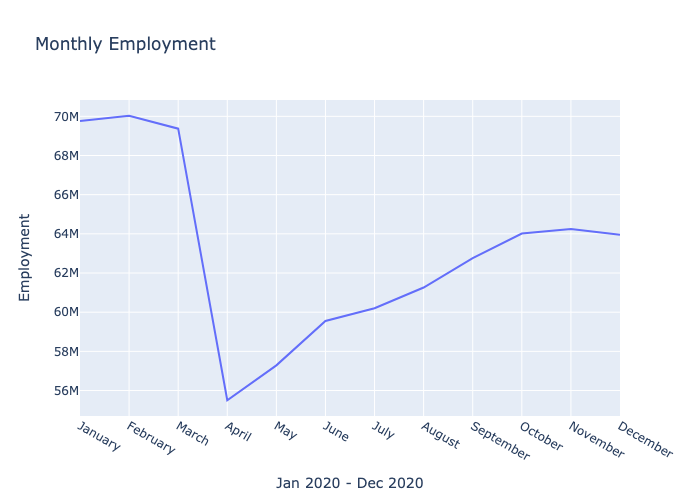

In [35]:
# adding the sum of the each month to plot
ny_employment_jan = ny_employment_jan_feb_mar["January Employment"].sum()
ny_employment_feb = ny_employment_jan_feb_mar["February Employment"].sum()
ny_employment_mar = ny_employment_jan_feb_mar["March Employment"].sum()

ny_employment_apr = ny_employment_apr_may_jun["April Employment"].sum()
ny_employment_may = ny_employment_apr_may_jun["May Employment"].sum()
ny_employment_jun = ny_employment_apr_may_jun["June Employment"].sum()

ny_employment_jul = ny_employment_jul_aug_sep["July Employment"].sum()
ny_employment_aug = ny_employment_jul_aug_sep["August Employment"].sum()
ny_employment_sep = ny_employment_jul_aug_sep["September Employment"].sum()

ny_employment_oct = ny_employment_oct_nov_dec["October Employment"].sum()
ny_employment_nov = ny_employment_oct_nov_dec["November Employment"].sum()
ny_employment_dec = ny_employment_oct_nov_dec["December Employment"].sum()

months = ["January", "February", "March", "April","May","June","July", "August", "September", "October", "November", "December"]
employment_sums = [ny_employment_jan, ny_employment_feb, ny_employment_mar, ny_employment_apr, ny_employment_may, ny_employment_jun, ny_employment_jul, ny_employment_aug, ny_employment_sep, ny_employment_oct, ny_employment_nov, ny_employment_dec]

data = {
    'Jan 2020 - Dec 2020': months,
    'Employment': employment_sums
}
# plot
fig = px.line(data, x='Jan 2020 - Dec 2020', y='Employment', title='Monthly Employment')
fig.write_image("employ.png")
Image(filename="employ.png")

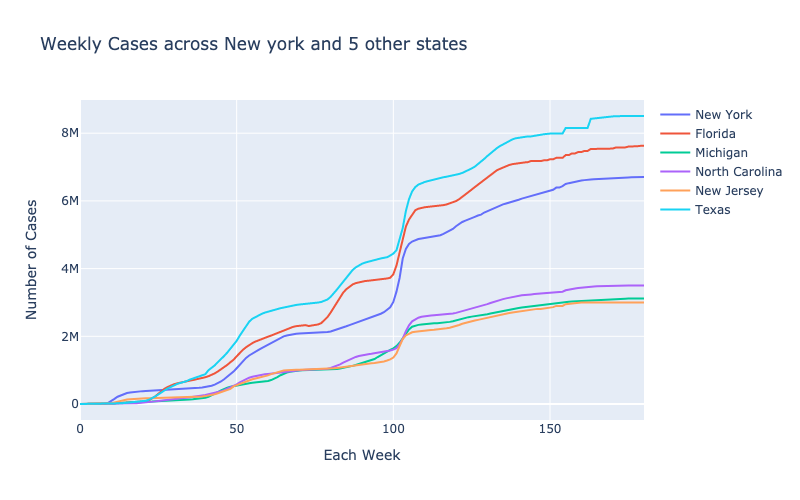

In [41]:
# Graph the 5 other states case data
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_ny_data.index, y=weekly_cases_ny_data,
                         mode='lines', name='New York'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesFL.index, y=dfWeeklyCasesFL,
                         mode='lines', name='Florida'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesMI.index, y=dfWeeklyCasesMI,
                         mode='lines', name='Michigan'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesNC.index, y=dfWeeklyCasesNC,
                         mode='lines', name='North Carolina'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesNJ.index, y=dfWeeklyCasesNJ,
                         mode='lines', name='New Jersey'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesTX.index, y=dfWeeklyCasesTX,
                         mode='lines', name='Texas'))
fig.update_layout(
    title='Weekly Cases across New york and 5 other states',
    xaxis=dict(title='Each Week'),
    yaxis=dict(title='Number of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("compare_cases.png")
Image(filename="compare_cases.png")

## Correlation?

### In the beginning I thought that as cases of covid-19 rose there would be an inverse correlartion or the levels of employment would decrease. However as witnessed here, even though covid-19 cases rises so did employemnt rate. There was a direct correlartion of increase of covid-19 cases and increase in employment

### Some reasons as to Why this is:

#### -Economic Recovery: As mentioned, the period in question coincides with the phase when the economy was in the recovery stage after lockdowns. Economic recovery can lead to an increase in employment, even if COVID-19 cases are still present.
#### -Industry Variability: Different industries may be affected differently by the pandemic. Some industries might have been hit harder, leading to a drop in employment, while others could have adapted or experienced increased demand, leading to employment growth.
#### -Government Policies: Government policies and interventions can play a significant role. Stimulus packages, support for businesses, and other measures can impact employment independently of COVID-19 cases.
#### -Lag Effects: There may be a time lag between changes in COVID-19 cases and changes in employment. The impact of COVID-19 on businesses and employment might not be immediate.
#### -Testing and Reporting: The availability of testing and the reporting of cases can also influence the recorded COVID-19 data. Testing capacity can change over time, affecting the reported number of cases.
#### -Population Density: The density of the population in a region can also affect the spread of the virus and employment trends. Urban areas, for example, might experience different patterns compared to rural areas.

## Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)

- For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.

### Hypothesis 1: Economic Recovery and COVID-19 Cases

##### Null Hypothesis (H0): Economic recovery, as indicated by higher employment rates, does not significantly influence the number of COVID-19 cases in a state.

##### Alternative Hypothesis (H1): States with higher employment rates experience a statistically significant increase in COVID-19 cases.

- Explanation: We hypothesize that economic recovery, characterized by increased employment rates, may contribute to a rise in COVID-19 cases. This is based on the assumption that during periods of economic recovery, people might be more active, leading to increased social interactions, which could potentially facilitate the spread of the virus. Our analysis will test whether there is a significant positive correlation between employment rates and COVID-19 case numbers.

### Hypothesis 2: Lockdowns and COVID-19 Cases

##### Null Hypothesis (H0): The lifting of COVID-19 lockdowns does not have a significant impact on the number of COVID-19 cases in a state.

##### Alternative Hypothesis (H1): States that ended lockdowns experience a statistically significant increase in COVID-19 cases.

- Explanation: We propose that the end of lockdowns, typically associated with a reduction in restrictions and increased social mobility, could lead to a surge in COVID-19 cases. This hypothesis is grounded in the belief that relaxed restrictions may result in people engaging in more activities that could facilitate the spread of the virus. Our analysis will assess whether there is a significant correlation between the timing of lockdown lifting and COVID-19 case numbers.

### Hypothesis 3: Holidays and COVID-19 Cases

##### Null Hypothesis (H0): High levels of holiday gatherings do not significantly contribute to an increase in COVID-19 cases during the holiday season.

##### Alternative Hypothesis (H1): States with more holiday gatherings experience a statistically significant surge in COVID-19 cases during the months of July to December.

- Explanation: We posit that periods characterized by high levels of holiday gatherings, such as the 4th of July, Halloween, Thanksgiving, and Christmas, could lead to an upsurge in COVID-19 cases. This hypothesis is based on the idea that increased social interactions during holidays can facilitate viral transmission. Our analysis will explore whether there is a noteworthy correlation between the occurrence of holiday gatherings and COVID-19 case numbers during the examined months from July to December.

##### In terms of correlations and patterns:

##### Economic Recovery and COVID-19 Cases: The analysis will aim to identify whether higher employment rates correlate with an increase in COVID-19 cases. If a positive correlation is found, it suggests that economic recovery might play a role in driving up case numbers.
##### End of Lockdowns and COVID-19 Cases: This analysis will seek to establish a correlation between the lifting of lockdowns and a surge in COVID-19 cases. If a significant correlation is identified, it implies that relaxing restrictions may lead to a rise in cases.
##### Holiday Gatherings and COVID-19 Cases: The research will focus on whether the occurrence of holiday gatherings corresponds to spikes in COVID-19 cases. A positive correlation would suggest that holiday gatherings are contributing to the spread of the virus during these months.